### 3.6 *Lab: Linear Regression*

##### 3.6.1 *Importing packages*

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [5]:
import statsmodels.api as sm

In [6]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [7]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

### *Inspecting objects and Namespaces*

In [8]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [9]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [10]:
A.sum()

19

#### 3.6.2 *Simple Linear Regression*

In [11]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [12]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [13]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [14]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [15]:
design = MS(["lstat"])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [16]:
design = MS(["lstat"])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.08e-88
Time:                        20:37:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [19]:
new_df = pd.DataFrame({"lstat": [5, 10 , 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [20]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [21]:
new_predictions.conf_int(alpha=0.5)

array([[29.53006154, 30.07712669],
       [24.85435487, 25.25233981],
       [20.10675447, 20.49944667]])

In [22]:
new_predictions.conf_int(obs=True, alpha = 0.5)

array([[25.59919254, 34.00799568],
       [20.85313657, 29.25355811],
       [16.10301435, 24.5031868 ]])

### *Defining Functions*

In [23]:
def abline(ax, b ,a):
    "Add a line with a slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim)

In [24]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

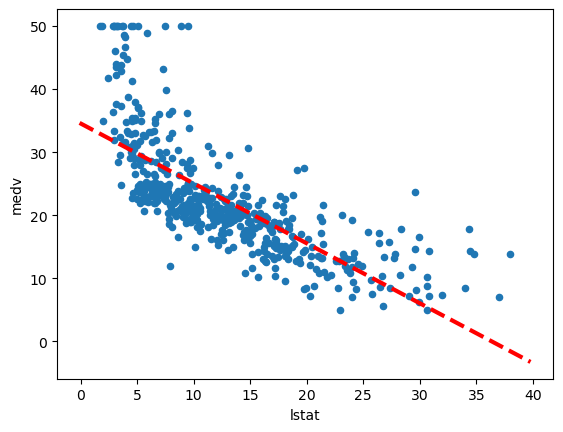

In [25]:
ax = Boston.plot.scatter("lstat", "medv")
abline(ax,
      results.params[0],
      results.params[1],
       "r--",
       linewidth=3)

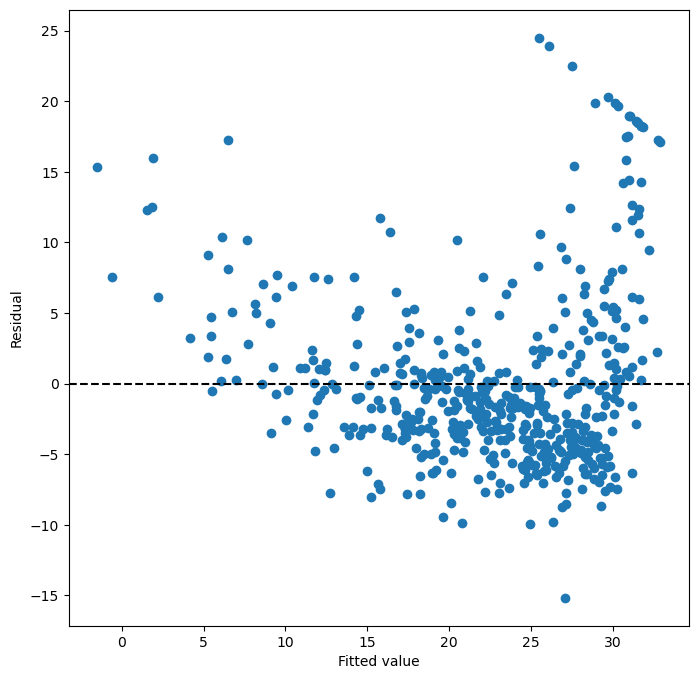

In [26]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--");

374

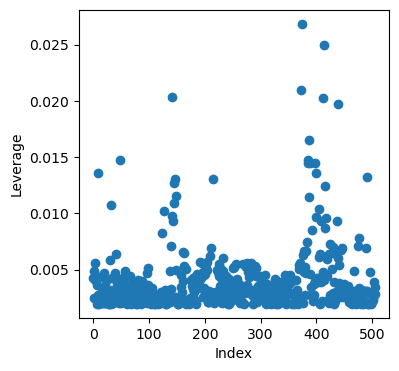

In [27]:
infl = results.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

### *Multi Linear Regression*

In [28]:
X = MS(["lstat", "age"]).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [29]:
terms = Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [30]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [31]:
minus_age = Boston.columns.drop(["medv", "age"])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### *Multivariate Goodness of Fit*

In [32]:
vals = [VIF(X, 1)
       for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif": vals},
                  index=X.columns[1:])
vif

,vif
crim,1.767486
zn,1.767486
indus,1.767486
chas,1.767486
nox,1.767486
rm,1.767486
age,1.767486
dis,1.767486
rad,1.767486
tax,1.767486


In [33]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

##### Interaction Terms

In [34]:
X = MS(["lstat",
       "age",
       ("lstat", "age")]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### *Non-Linear Transformations of the Predictors*

In [35]:
X = MS([poly("lstat", degree=2), "age"]).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [36]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


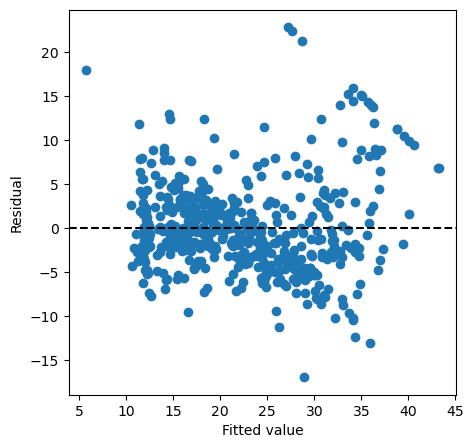

In [37]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--")

#### *Quatitative Predictors*

In [38]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [39]:
allvars = list(Carseats.columns.drop("Sales"))
y = Carseats["Sales"]
final = allvars + [("Income", "Advertising"),
                  ("Price", "Age")]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


#### *Lab Related Questions*

In [3]:
import pandas as pd
auto_data = pd.read_csv("Auto.csv")

In [4]:
# Here x will be predictor that is horsepower, y will be response i.e mpg
y = auto_data["mpg"]
x = auto_data["horsepower"]

In [5]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = sm.add_constant(x)

In [6]:
print(auto_data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [7]:
auto_data = pd.read_csv("Auto.csv")

print(auto_data.dtypes)

print(auto_data["horsepower"].unique())

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [8]:
auto_data["horsepower"] = pd.to_numeric(auto_data["horsepower"],
                                        errors="coerce")

auto_data = auto_data.dropna(subset=["horsepower"])

print(auto_data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [9]:
import statsmodels.api as sm
X = auto_data["horsepower"]
y = auto_data["mpg"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        15:02:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
horsepower_98 = pd.DataFrame({"horsepower": [98]})
horsepower_98 = sm.add_constant(horsepower_98)

pred_mpg = model.get_prediction(horsepower_98)
print(pred_mpg.summary_frame(alpha=0.05))

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'TV': [230, 44, 17, 151, 180, 8, 200, 66, 150, 180],
    'Radio': [37, 39, 45, 41, 10, 49, 35, 44, 40, 38],
    'Sales': [22, 10, 7, 19, 20, 4, 21, 8, 17, 18]}

df = pd.DataFrame(data)
print(df.head())

    TV  Radio  Sales
0  230     37     22
1   44     39     10
2   17     45      7
3  151     41     19
4  180     10     20


Here we have taken a sample data set of TV Radio and sales.

In [15]:
df.describe()

,TV,Radio,Sales
count,10.000000,10.000000,10.000000
mean,122.600000,37.800000,14.600000
std,81.198248,10.612362,6.636599
min,8.000000,10.000000,4.000000
25%,49.500000,37.250000,8.500000
50%,150.500000,39.500000,17.500000
75%,180.000000,43.250000,19.750000
max,230.000000,49.000000,22.000000


In [16]:
X = df[['TV', 'Radio']]
X = sm.add_constant(X)
y = df['Sales']

Here dependent variable is Y i.e Sales and X is independent variable i.e TV and Radio.

In [18]:
model = sm.OLS(y, X).fit()
model.summary()

C:\Users\Asus\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     82.36
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.37e-05
Time:                        16:19:40   Log-Likelihood:                -16.589
No. Observations:                  10   AIC:                             39.18
Df Residuals:                       7   BIC:                             40.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1882      2.798      2.569      0.037       0.573      13.803
TV             0.0762      0.007     10.247      0.000       0.059       0.094
Radio         -0.0511      0.057     -0.898      0.399      -0.186       0.083
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.424
Skew:                           0.302   Prob(JB):                        0.809
Kurtosis:                       2.193   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: indicates that 95.9% of the variability in the dependent variable (sales) is explained by the independent variables (x1, x2). This is a high value, suggesting a good fit of the model to the data.
adj. R squared: For the number of predictors. Since it is close to R², it means our model is not overfitting.
P-values: 0.037 < 0.05, low p value.
